In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv");
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type', 'availability', 'society'], axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
import seaborn as sn

<Axes: >

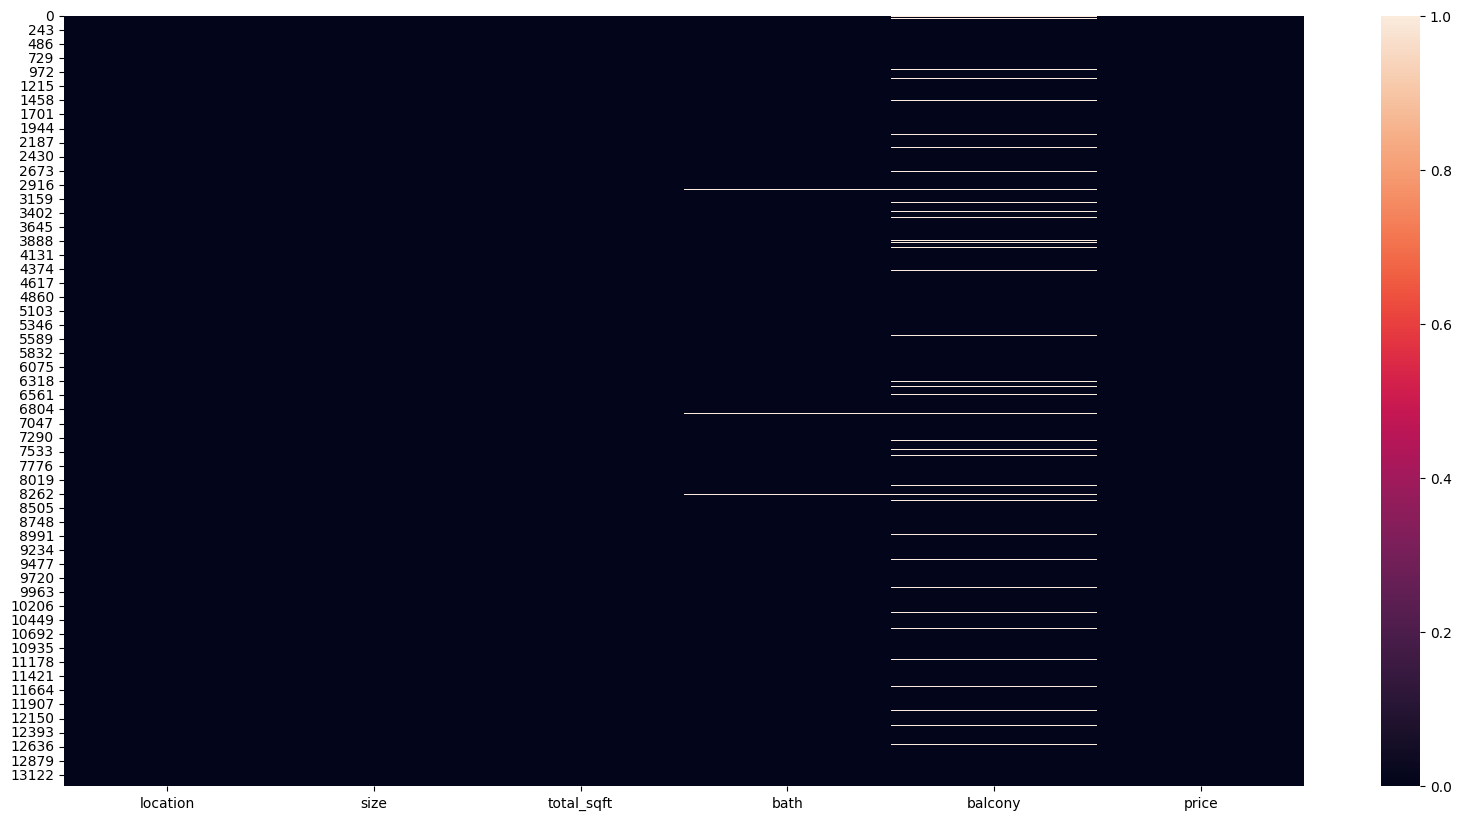

In [8]:
sn.heatmap(df2.isnull())

In [9]:
df2['balcony'].fillna(0, inplace=True)

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\VINAY HEGDE\AppData\Local\Temp\ipykernel_16636\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [18]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_Float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df3[~df3['total_sqft'].apply(is_Float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,0.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [21]:
def getAverageSqft(x):
    y = x.split('-')
    if len(y) == 2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return False


In [22]:
df3['total_sqft'] = df3['total_sqft'].apply(getAverageSqft)

C:\Users\VINAY HEGDE\AppData\Local\Temp\ipykernel_16636\2454133757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'] = df3['total_sqft'].apply(getAverageSqft)


In [23]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [24]:
getAverageSqft('342-123')

232.5

In [25]:
df4 = df3.copy()

In [26]:
df4.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1304, dtype: int64

In [27]:
len(df4.location.unique())

1304

In [28]:
locations_stats = df4.groupby('location')['location'].agg('count')

In [29]:
locations_stats.sort_values(ascending=False)

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [30]:
df4[df4.location=="Whitefield"]

,location,size,total_sqft,bath,balcony,price,bhk
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
27,Whitefield,3 BHK,1610.0,3.0,2.0,81.00,3
47,Whitefield,2 BHK,1459.0,2.0,1.0,94.82,2
...,...,...,...,...,...,...,...
13235,Whitefield,3 BHK,1730.0,3.0,2.0,125.00,3
13257,Whitefield,3 BHK,1453.0,2.0,2.0,58.00,3
13258,Whitefield,1 BHK,877.0,1.0,1.0,59.00,1
13299,Whitefield,4 BHK,2856.0,5.0,0.0,154.50,4


In [31]:
print(len(locations_stats[locations_stats<=10]))
locations_stats_lessThan_10 = locations_stats[locations_stats<=10]
print(locations_stats_lessThan_10)

1063
location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1063, dtype: int64


In [32]:
df4.location = df4.location.apply(lambda x: 'other' if x in locations_stats_lessThan_10 else x)

In [33]:
len(df4.location.unique())

242

In [34]:
df4.head(20)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,0.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,0.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,0.0,370.00,6


In [35]:
len(df4[df4.total_sqft==0])
df4.total_sqft = df4.total_sqft.apply(lambda x: df4.total_sqft.mean() if x==0 else x)
len(df4[df4.price==0])

0

In [36]:
df4['price_per_sqft'] = df4['price'] *100000 / df4['total_sqft']

In [37]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [38]:
df4.shape

(13246, 8)

In [39]:
df4[df4.total_sqft/df4.bhk<400]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,0.0,370.0,6,36274.509804
16,Bisuvanahalli,3 BHK,1180.0,3.0,2.0,48.0,3,4067.796610
26,Electronic City,2 BHK,660.0,1.0,1.0,23.1,2,3500.000000
29,Electronic City,3 BHK,1025.0,2.0,1.0,47.0,3,4585.365854
31,Bisuvanahalli,3 BHK,1075.0,2.0,1.0,35.0,3,3255.813953
...,...,...,...,...,...,...,...,...
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13300,Hosakerehalli,5 Bedroom,1500.0,6.0,2.0,145.0,5,9666.666667
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649
13306,other,4 Bedroom,1200.0,5.0,0.0,325.0,4,27083.333333


In [40]:
df5 = df4[~(df4.total_sqft/df4.bhk<400)]

In [41]:
df5.shape

(11744, 8)

In [42]:
df5.price_per_sqft.describe()

count     11744.000000
mean       6184.524533
std        4009.998009
min         267.829813
25%        4206.163774
50%        5277.913279
75%        6807.339450
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
def remove_PPS_outliers(df):
    out_df = pd.DataFrame()
    for key, sbdf in df.groupby('location'):
        sMean = np.mean(sbdf.price_per_sqft)
        sStd = np.std(sbdf.price_per_sqft)
        reduced_df = sbdf[(sbdf.price_per_sqft>(sMean-sStd)) & (sbdf.price_per_sqft<(sMean+sStd))]
        out_df = pd.concat([out_df, reduced_df], ignore_index=True)
    return out_df

In [44]:
df6 = remove_PPS_outliers(df5)

In [45]:
df6.shape

(9535, 8)

In [46]:
def plot_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (20,15)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='yellow', s=60, label='2 bhk')
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', s=60, label='3 bhk')
    plt.xlabel('Total sqft area')
    plt.ylabel('Price Per Sqft area')
    plt.title(location)
    plt.legend()
    plt.plot()

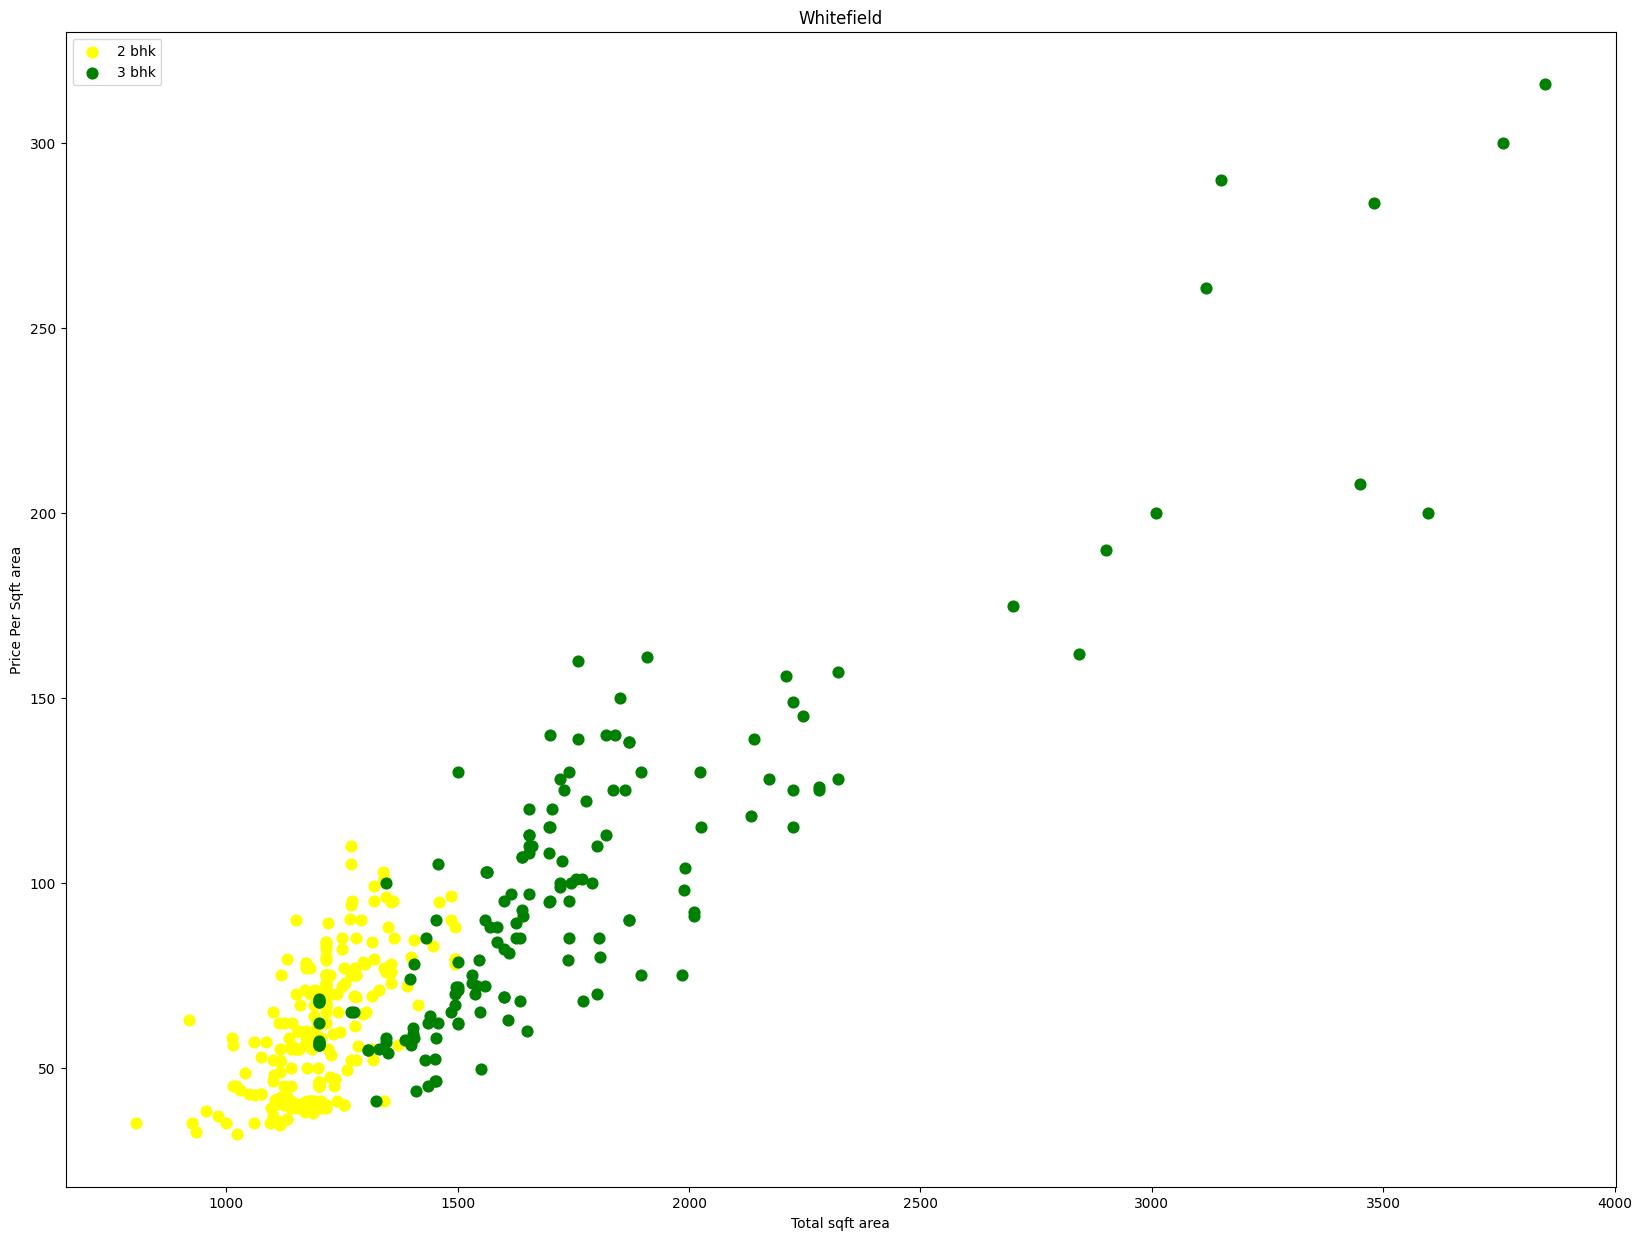

In [47]:
plot_chart(df6, "Whitefield")

In [48]:
def remove_outliers_bhk(df):
    exclude_indices =  np.array([])
    for location, loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqft<(stats['mean']))].index.values)
    return df.drop(exclude_indices, axis='index')

In [49]:
df7 = remove_outliers_bhk(df6)

In [50]:
df7.shape

(6853, 8)

In [51]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699


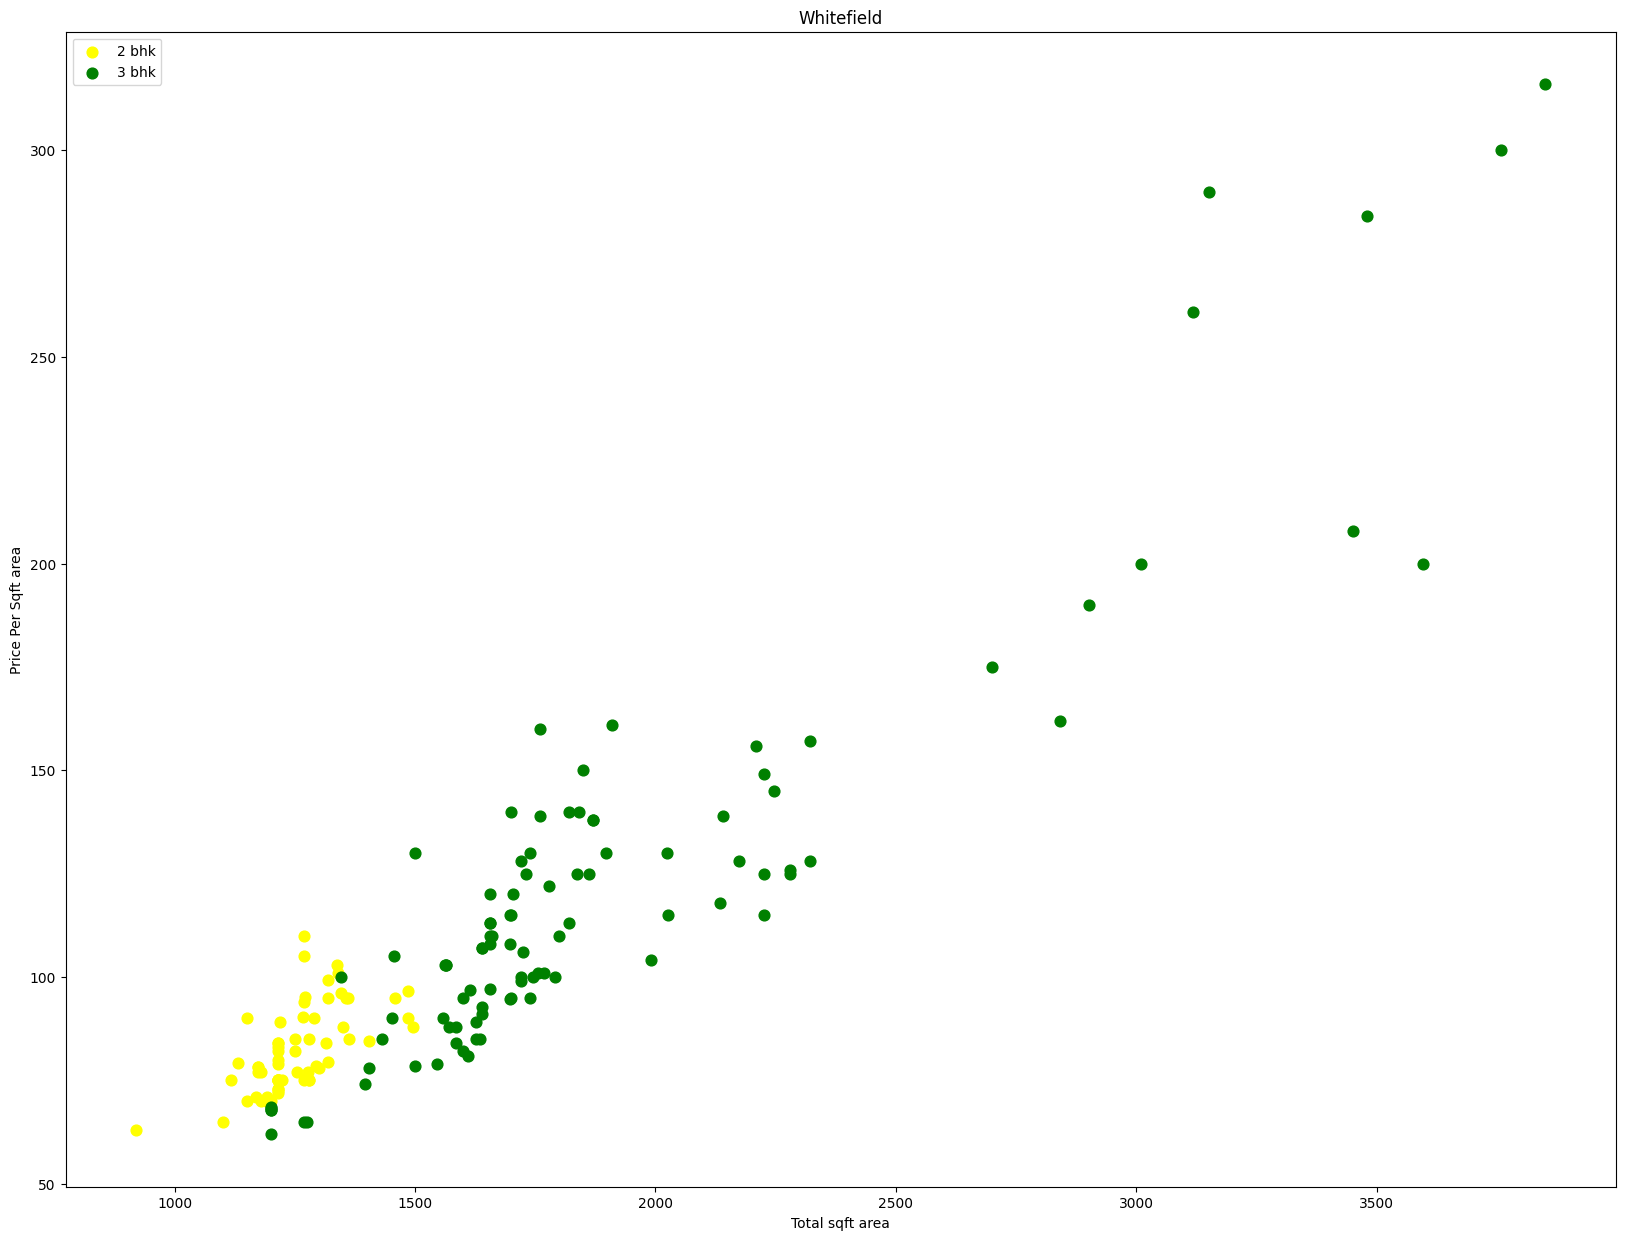

In [52]:
plot_chart(df7, "Whitefield")

Text(0, 0.5, 'count')

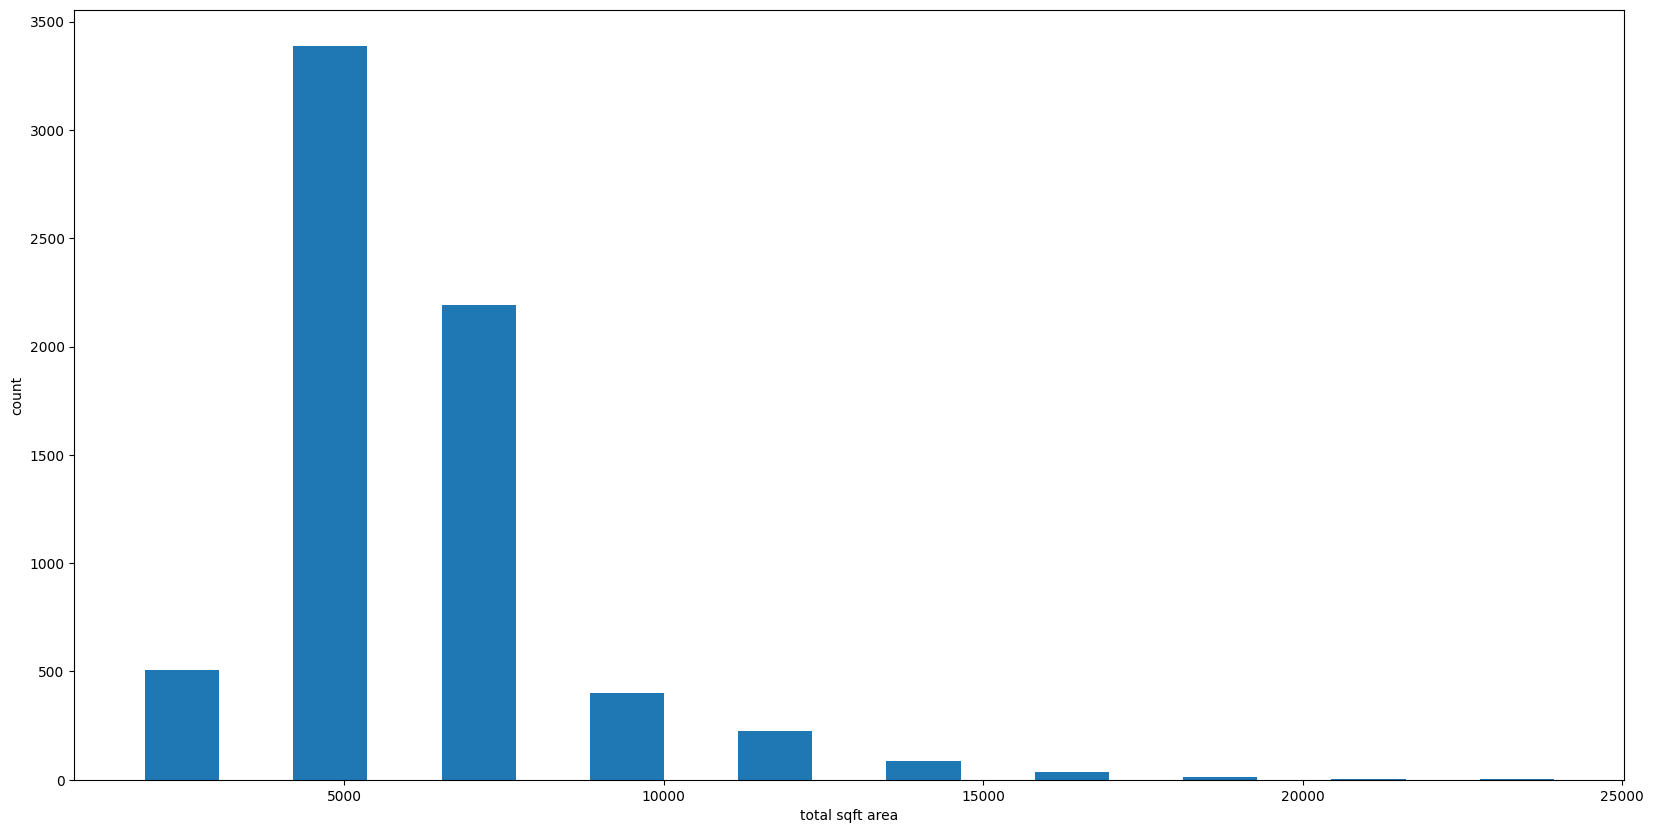

In [53]:
matplotlib.rcParams['figure.figsize'] = [20,10]
plt.hist(df7.price_per_sqft, rwidth=0.5)
plt.xlabel('total sqft area')
plt.ylabel('count')

Text(0, 0.5, 'count')

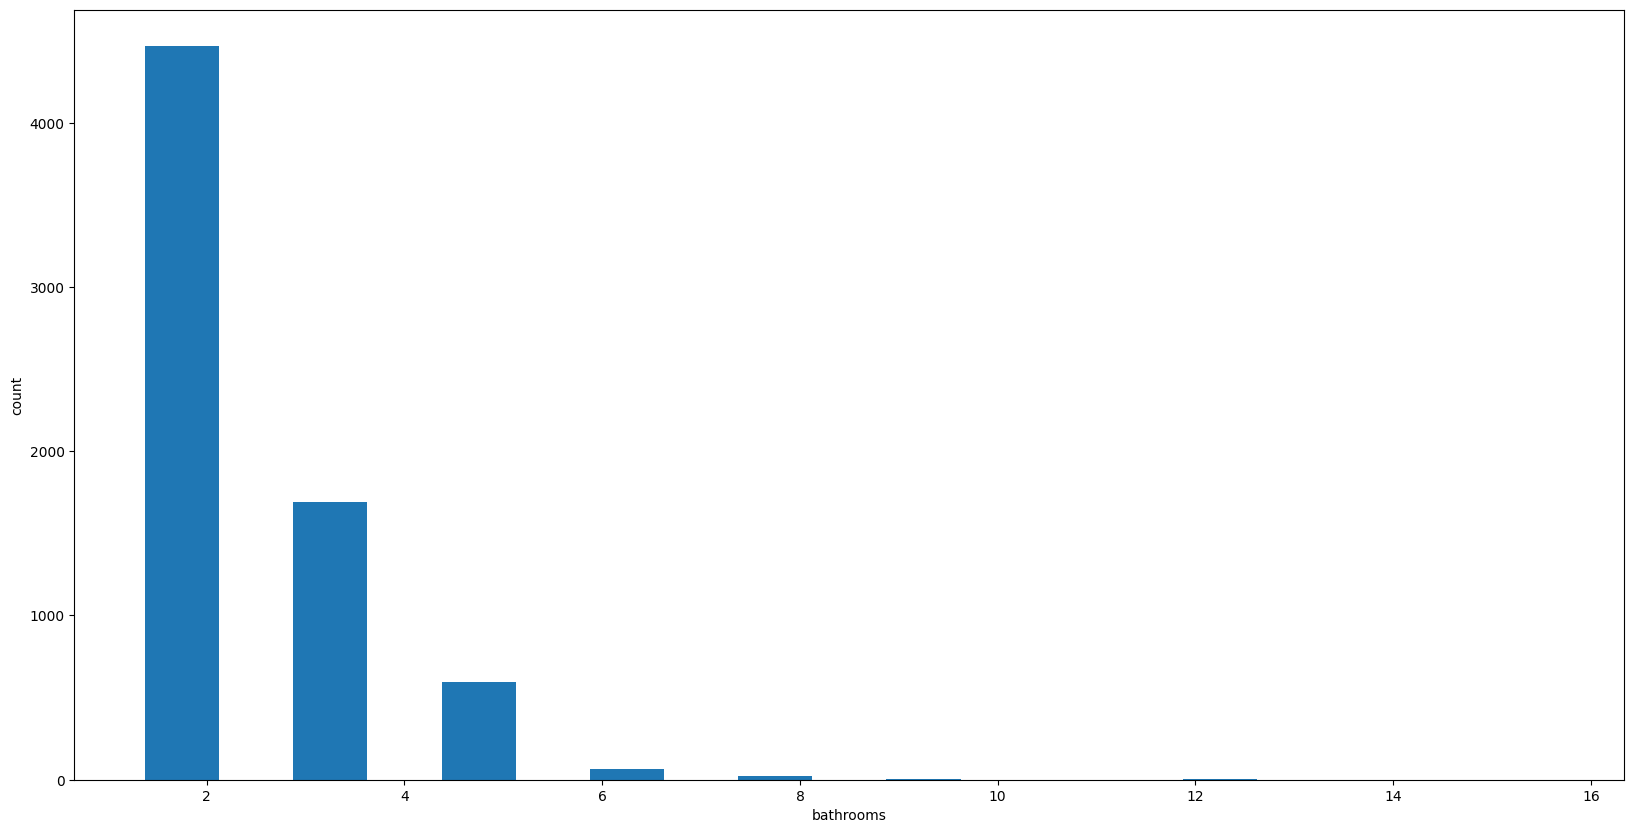

In [54]:
matplotlib.rcParams['figure.figsize'] = [20,10]
plt.hist(df7.bath, rwidth=0.5)
plt.xlabel('bathrooms')
plt.ylabel('count')

In [55]:
df7.shape

(6853, 8)

In [56]:
df7[df7.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
4839,Neeladri Nagar,10 BHK,4000.0,12.0,0.0,160.0,10,4000.000000
7897,other,10 BHK,12000.0,12.0,0.0,525.0,10,4375.000000
7976,other,16 BHK,10000.0,16.0,0.0,550.0,16,5500.000000
8655,other,11 BHK,6000.0,12.0,0.0,150.0,11,2500.000000
8967,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [57]:
df7[df7.bath<df7.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...,...
9526,other,2 BHK,1200.0,2.0,3.0,70.0,2,5833.333333
9527,other,1 BHK,1800.0,1.0,1.0,200.0,1,11111.111111
9530,other,2 BHK,1353.0,2.0,2.0,110.0,2,8130.081301
9531,other,1 Bedroom,812.0,1.0,0.0,26.0,1,3201.970443


In [129]:
df8 = df7[df7.bath<df7.bhk+2]
df8 = df8[df8.balcony<=df8.bhk]
df8.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699


In [130]:
df8.shape

(6536, 8)

In [131]:
df9 = df8.drop(['price_per_sqft', 'size'], axis=1)
df9

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2
...,...,...,...,...,...,...
9524,other,1155.0,2.0,1.0,64.0,2
9527,other,1800.0,1.0,1.0,200.0,1
9530,other,1353.0,2.0,2.0,110.0,2
9531,other,812.0,1.0,0.0,26.0,1


In [132]:
dummy_location = pd.get_dummies(df9.location)
dummy_location.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [133]:
df10 = pd.concat([df9.drop(['location'], axis=1), dummy_location.drop(['other'], axis=1)], axis=1)

In [134]:
df10.replace({False: 0, True: 1}, inplace=True)
df10.head()

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
X = df10.drop(['price'], axis=1)
print(X.head())
print(X.shape)

   total_sqft  bath  balcony  bhk   Devarachikkanahalli  1st Block Jayanagar  \
1      1250.0   2.0      2.0    2                     1                    0   
2      1200.0   2.0      2.0    2                     1                    0   
3      1170.0   2.0      2.0    2                     1                    0   
4      1425.0   2.0      2.0    3                     1                    0   
5       947.0   2.0      2.0    2                     1                    0   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   
5                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
1      

In [136]:
Y = df10['price']
print(Y.head)
print(Y.shape)

<bound method NDFrame.head of 1        40.0
2        83.0
3        40.0
4        65.0
5        43.0
        ...  
9524     64.0
9527    200.0
9530    110.0
9531     26.0
9534    400.0
Name: price, Length: 6536, dtype: float64>
(6536,)


In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [138]:
from sklearn.linear_model import LinearRegression
lr_Model = LinearRegression()
lr_Model.fit(X_train, Y_train)
lr_Model.score(X_test, Y_test)

0.8180908767326196

In [139]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
cross_val_score(LinearRegression(), X, Y, cv= cv)


array([0.86450346, 0.86881168, 0.79858096, 0.8124585 , 0.8001047 ,
       0.88021756, 0.81838322, 0.86049755, 0.87291379, 0.82925324])

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {}
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
    for algo, config in algos.items():
        grs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        grs.fit(x,y)
        scores.append({
            'model' : algo,
            'best_score' : grs.best_score_,
            'best_params' : grs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [159]:
find_best_model(X,Y)

,model,best_score,best_params
0,linear_regression,0.840572,{}
1,lasso,0.709128,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.704924,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [176]:
def prediction_model(location, sqft, bhk, bath):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_Model.predict([x])[0]

In [177]:
prediction_model("Indira Nagar", 1000, 3, 3)

177.69234034216566

In [178]:
import pickle
with open('house_price_predictor.pickle', 'wb') as f:
    pickle.dump(lr_Model, f)

In [180]:
import json

columns = {
    'data_column' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))